## Helium Data Project
##### Nick McVay
##### Professor Gina Sprint
##### 4/20/22
## Introduction
##### This Project will focus on analyzing my personal helium hotspot earings in accordance with external factors and hotspot performance. More specifically, these external factors will include crypto markets, captial markets, Spokane weather, and day of the week. As for hotspot performance I will measure relationship between hnt mined in relation to tempature, rain, and day of the week.


##### I started this project by pulling data on my helium mining performance including hnt mined and the value of that hnt mined on that given day. I did that through a community platform called "Fair Spot" that allows you to export data for your wallet. I then exported data from "CoinMarketCap" on the main crypto market including daily prices and percent gains for Ethereum & Bitcoin for the same dates as helium data. Next, I exported data from "Yahoo Finance" on two major capital indexes known as the S&P 500 & Nasdaq. All these datasets were exported for the same period of time (2021-10-04 to 2022-03-25), all have daily instances, all in csv file format. As for my spokane weather data, this was exported via api and imported to the project in csv format - it includes daily tempature high & precipitation for the research period (tmax & prcp). I ran an inner merger on all these exports on date so that they align perfectly with my helium data.
##### The potential impacts of the results are that I will be able to confidently gauge what my helium earnings will do relative to capital & crypto markets, spokane weather, and day of the week. So much so if I know that we are going into a recession due to high inflation then I will confidently know if my earning will fall or rise for that period. The stakeholders of this project are myself and anyone else who is intersted in how helium miners perform in accordance with external factors.




## Data Analysis
##### Some data cleaning I had to do was to alter the font formating for the dates on the csv's so that they successfully merge. As for the main table, all weekends had to be omitted given that captial markets do not operate on weekends - however a seperate table was generated to measure helium earnings on weekends versus weekdays. Some challenging aspects of the data preperation were basic data wrangling where csv exports weren't in the correct format in addition I had to add elements that measured daily %change in order to measure trends/relationships.
##### Below I will import spokane weather data for these dates using the meteostat & mapquest api's from DA4 and then merge it with our table containing information on capital and crypto markets:

In [76]:
import pandas as pd
import numpy as np
import Utils2 as ut
#import datetime
d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')
wdf = pd.read_csv("Spokane_daily_weather_cleaned.csv",parse_dates=['Date'], date_parser=d_parser)
wdf.drop(["tavg","tmin","snow","wdir","wspd","wpgt","pres","tsun"],axis =1, inplace=True)
wdf.set_index("Date",inplace=True)
mdf = pd.read_csv("Helium_Project_data1.csv",parse_dates=['Date'], date_parser=d_parser)
mdf.set_index("Date",inplace=True)

mdf = pd.merge(mdf,wdf,how = 'inner', on = 'Date')
print(mdf.head())

            Helium(%)  Helium  Ethereum(%)  Ethereum  Bitcoin(%)   Bitcoin  \
Date                                                                         
2021-10-04  24.349335   21.50    13.916425   3418.78   10.023954  48208.91   
2021-10-05  -3.209302   20.81    -1.082257   3381.78    2.003883  49174.96   
2021-10-06   4.324844   21.71     3.985771   3516.57    4.700990  51486.67   
2021-10-07  -0.552741   21.59     1.713033   3576.81    7.481451  55338.62   
2021-10-08  -5.280222   20.45     0.308096   3587.83   -2.776488  53802.15   

            S&P 500(%)  S&P 500  Nasdaq(%)    Nasdaq  tmax   prcp  
Date                                                               
2021-10-04    0.733816  4348.84  -0.012487  14493.12  71.1  0.000  
2021-10-05   -0.896101  4309.87  -1.243763  14312.86  75.0  0.000  
2021-10-06    0.225065  4319.57  -0.163559  14289.45  60.1  0.043  
2021-10-07    1.485333  4383.73   2.395824  14631.80  59.0  0.000  
2021-10-08    0.519649  4406.51   0.430022  1

<ipython-input-76-97b8cd7c301d>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')


##### Then I will Merge that last table with my Helium earnings table which contains information on how much HNT my miner mined that day and how much it was worth based off the average oracle price of that day. Now we have the Main dataframe!

In [77]:
whdf = pd.read_csv("Helium_Earnings.csv",parse_dates=['Date'], date_parser=d_parser)
whdf.set_index("Date",inplace=True)
hdf = whdf.drop("Weekend",axis=1)
hdf = pd.merge(mdf,hdf,how='inner',on='Date')
print(hdf)

            Helium(%)  Helium  Ethereum(%)  Ethereum  Bitcoin(%)   Bitcoin  \
Date                                                                         
2021-10-04  24.349335   21.50    13.916425   3418.78   10.023954  48208.91   
2021-10-05  -3.209302   20.81    -1.082257   3381.78    2.003883  49174.96   
2021-10-06   4.324844   21.71     3.985771   3516.57    4.700990  51486.67   
2021-10-07  -0.552741   21.59     1.713033   3576.81    7.481451  55338.62   
2021-10-08  -5.280222   20.45     0.308096   3587.83   -2.776488  53802.15   
...               ...     ...          ...       ...         ...       ...   
2022-03-21  -1.894273   22.27     1.622709   2860.10    0.735844  41246.13   
2022-03-22   2.290076   22.78     1.317087   2897.77   -0.417082  41074.10   
2022-03-23   9.920983   25.04     2.601311   2973.15    3.141347  42364.38   
2022-03-24   0.958467   25.28     1.947766   3031.06    1.232805  42886.65   
2022-03-25  -0.316456   25.20     2.553232   3108.45    2.513370

<ipython-input-76-97b8cd7c301d>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  d_parser = lambda x: pd.datetime.strptime(x,'%Y-%m-%d')


##### Lastly I will build a dataframe that will help us track the difference in my hotspot's performance on weekends versus weekdays.

In [78]:
whdf = ut.weekend_filter(whdf)
print(whdf.head(7))



            hnt_Mined  Helium_Oracle_Price  Mined_Value  Weekend
Date                                                            
2021-10-04       0.41                20.61         8.38        0
2021-10-05       0.31                21.41         6.66        0
2021-10-06       0.15                21.27         3.09        0
2021-10-07       0.28                21.08         5.96        0
2021-10-08       0.44                20.47         9.04        0
2021-10-09       0.11                20.18         2.21        1
2021-10-10       0.30                19.61         5.92        1


##### Now that we have the data we need we can start to visulize some aspects of the dataset.

##### Below is a line plot showing the relationship between HNT prices and Etheruem prices

Text(0.5, 1.0, 'Relationship Between Price Movements in Helium and Ethereum from 10/2021 to 3/2022')

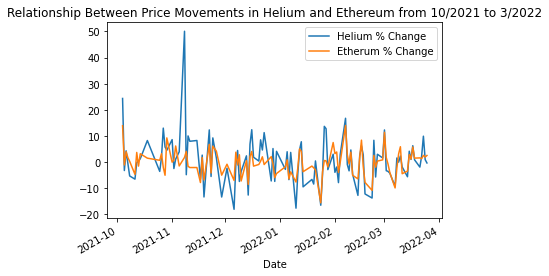

In [79]:
import matplotlib.pyplot as plt
plt.figure()
%matplotlib inline
hdf["Helium(%)"].plot(label="Helium % Change")
hdf["Ethereum(%)"].plot(label = "Etherum % Change")
plt.legend()
plt.title("Relationship Between Price Movements in Helium and Ethereum from 10/2021 to 3/2022")




>As you can see above their is a perceived strong relationship between Ethereum and Helium pricing which is due to Ethereum making up a significantly large proportion of the crypto market - so when markets are up, Helium will follow.

##### Below are simple visualizations of Hnt Mined and Value Mined for the period of the study. Some base data aggregation I am running includes collecting the average and standard deviation of HNT Mined and Value Mined

Average HNT Mined Daily: 0.23 HNT Tokens
Standard Deviation of HNT Mined: 0.11 HNT Tokens


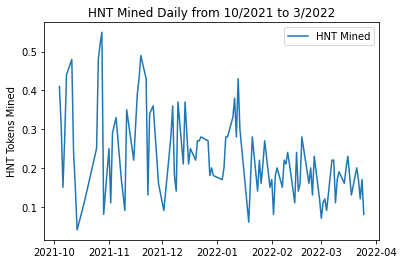

In [80]:
plt.figure()
plt.plot(hdf.index.values,hdf["hnt_Mined"],label ="HNT Mined")
plt.legend()
plt.ylabel("HNT Tokens Mined")
plt.title("HNT Mined Daily from 10/2021 to 3/2022")
print("Average HNT Mined Daily:",round(np.mean(hdf["hnt_Mined"]),2),"HNT Tokens")
print("Standard Deviation of HNT Mined:", round(np.std(hdf["hnt_Mined"]),2),"HNT Tokens")

Average Value Mined Daily 6.9 Dollars
Standard Deviation of Dollars Earned 4.16


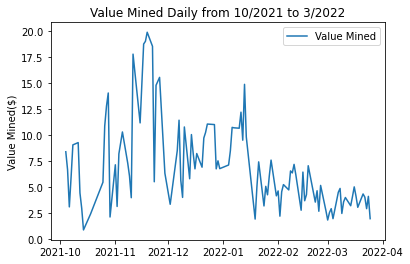

In [81]:
plt.figure()
plt.plot(hdf.index.values,hdf["Mined_Value"],label ="Value Mined")
plt.legend()
plt.ylabel("Value Mined($)")
plt.title("Value Mined Daily from 10/2021 to 3/2022")
print("Average Value Mined Daily",round(np.mean(hdf["Mined_Value"]),2),"Dollars")
print("Standard Deviation of Dollars Earned", round(np.std(hdf["Mined_Value"]),2))

##### Below is a visualization of the Relationship between Helium prices and the S&P 500 index

Text(0.5, 1.0, 'Relationship Between Price Movements in Helium and Capital Markets from 10/2021 to 3/2022')

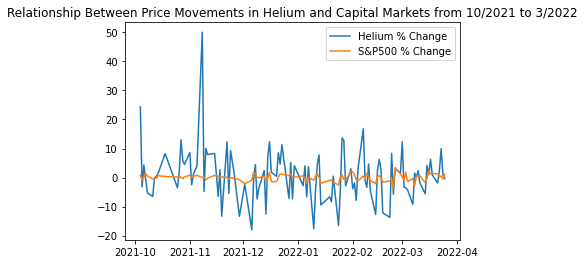

In [82]:
plt.figure()
plt.plot(hdf.index.values,hdf["Helium(%)"],label ="Helium % Change")
plt.plot(hdf.index.values,hdf["S&P 500(%)"], label = "S&P500 % Change")
plt.legend()
plt.title("Relationship Between Price Movements in Helium and Capital Markets from 10/2021 to 3/2022")

>As you can see above there is a much looser connection between price movements in the Captial Markets and in Helium. However, if you look closly you can see that trenchs and highs tend to line up between the two so that when there are major movements in the capital markets, Helium will respond.

#### Below is a visualization of HNT Mined on a certain day ploted with the tempature high for that day

Text(0.5, 1.0, 'Relationship Between HNT Mined and Daily Tempature Highs')

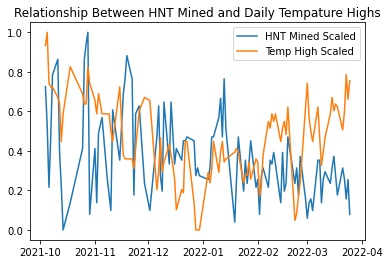

In [83]:
mining_scaled, tempature_scaled = ut.Scaler(hdf)

plt.figure()
plt.plot(hdf.index.values,mining_scaled,label ="HNT Mined Scaled")
plt.plot(hdf.index.values,tempature_scaled, label = "Temp High Scaled")
plt.legend()
plt.title("Relationship Between HNT Mined and Daily Tempature Highs")

>As you can see above even when these two attributes are scaled there is little between the two attributes at least graphically. But as with capital markets and Helium prices we can see a loose connection between trenches and highs. But we can quantify that possible relationship using hypothesis testing below:

### Next I will build out some basic hypothesis testing. Starting with a hypothesis test to see if hnt mined is different based on weather. More specifically I will see if hnt mined is different on days where temps are below 70 vs days where temp is above 70 degrees.
* $H_0: \mu_{L} = \mu_{H}$
* $H_1: \mu_{L} \neq \mu_{H}$ 
* Alpha: 0.10 (90% confidence)
* Decision Rule: If t-computed is greater than 1.960 which is our t-critical value for a independent two tailed test, then we will be able to reject our null hypothesis

In [84]:
from scipy import stats
Ldf = hdf[hdf["tmax"]<70]
Hdf = hdf[hdf["tmax"]>=70]
Low = Ldf["hnt_Mined"]
High = Hdf["hnt_Mined"]
print("dof:",len(Low)+len(High)-2)
lm = round(np.mean(Low),2)
hm = np.mean(High)
ut.ind_ttest(High,Low,.1)
print("Hnt_Mined is {:.2f}% higher on days where tempature high is 70 degrees or higher".format(((hm-lm)/lm)*100))




dof: 105
t: 1.7254612422254878 pval: 0.0873862579370644 alpha: 0.1
reject H0
Hnt_Mined is 56.52% higher on days where tempature high is 70 degrees or higher


* Decision: Given that our t-computed was larger than our t-critical we reject the null hypothesis and with 90% confidence are able to claim that hnt mined is different between days with a high below 70 degrees and a high above 70 degrees
* Thoughts: A big part of the helium industry has to do with tracking. My logic behind this hypothesis is that the network will be tracking less activity across the city on colder days. For instance one of the biggest corporate consumers of the Helium Network is Lime as in Lime scooters - so my logic in that case is more limes would be active on warmer days versus colder ones which could probably apply to a lot of other corporate consumers of the Helium Network.

### Next I will build out a hypothesis test to see if hnt mined is greater on days with days with no rain than hnt mined on days with rain. However for the split we are using 0.3 inches of percipitation to signal significant percipitation.
* $H_0: \mu_{R} \underline{>} \mu_{NR}$
* $H_1: \mu_{R} < \mu_{NR}$ 
* Alpha: 0.10 (90% confidence)
* Decision Rule: If t-computed is greater than 1.645 which is our t-critical value for a independent one tailed test, then we will be able to reject our null hypothesis

In [85]:
Rdf = hdf[hdf["prcp"]>.3]
NRdf = hdf[hdf["prcp"]<=.3]
Rdf = Rdf["hnt_Mined"]
NRdf = NRdf["hnt_Mined"]    
hrm = np.mean(Rdf)
lrm = np.mean(NRdf)
ut.ind_ttest(NRdf,Rdf,.05)
print("Hnt_Mined is {:.2f}% higher on days where there is less than 0.3 inches of percipitation".format(((lrm-hrm)/hrm)*100))
print("Hnt_Mined is 42.26% higher on days where there is less than 0.5 inches of percipitation")



t: 0.5300773253737144 pval: 0.5971774872465078 alpha: 0.05
do not reject H0
Hnt_Mined is 10.28% higher on days where there is less than 0.3 inches of percipitation
Hnt_Mined is 42.26% higher on days where there is less than 0.5 inches of percipitation


* Decision: Given that our t-computed was smaller than our t-critical we fail to reject the null hypothesis and with 90% confidence are unable to claim that hnt mined is higher on days where there was less than 0.3 inches of precipitation
* Thoughts: On days where there is significant percipitation there might be lower levels of acitvity on the Helium Network

### Next I will build out a hypothesis test based on how my miner performs on weekends versus weekdays
* $H_0: \mu_{WE} \underline{<} \mu_{WD}$
* $H_1: \mu_{WE} > \mu_{WD}$ 
* Alpha: 0.10 (90% confidence)
* Decision Rule: If t-computed is greater than 1.645 which is our t-critical value for a independent single tailed test, then we will be able to reject our null hypothesis

In [86]:
WEdf = whdf[whdf["Weekend"]==1]
WDdf = whdf[whdf["Weekend"]==0]
WEdf = WEdf["hnt_Mined"]
WDdf = WDdf["hnt_Mined"]    
WEm = np.mean(WEdf)
WDm = np.mean(WDdf)
print("dof:",len(WEdf)+len(WDdf)-2)
ut.ind_ttest(WEdf,WDdf,.05)
print("Hnt_Mined is {:.2f}% lower on weekends versus weekdays".format(((WEm-WDm)/WDm)*100))

dof: 156
t: -1.1518032003618464 pval: 0.2511640909601846 alpha: 0.05
do not reject H0
Hnt_Mined is -9.98% lower on weekends versus weekdays


* Decision: Given that our t-computed was smaller than our t-critical we fail to reject the null hypothesis and with 90% confidence are unable to claim that hnt mined is higher on weekends versus weekdays
* Thoughts: I was actually wrong about this, It looks like the Helium Network is more active on weekdays which now makes sense since its mostly utilizing by companies.

## Classification Results
##### For this dataset I want build a classification model that will work to predict for a particular day if earnings(Value_Mined) will be above the median amount or below the median amount.

In [ ]:
cat = []
